In [1]:
import pandas as pd 
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import spacy
import re
import string
import nltk
import pickle
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
nlp = spacy.load("en_core_web_sm")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score , accuracy_score , confusion_matrix , f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

#### 01. Write a python code to read the list of files from a directory and store it in a dataframe.

In [2]:
path=r"E:\college 3rd year\Quarter-4\1.NLP\toxic_comment_classification"

In [3]:
files = os.listdir(path)

In [4]:
data = pd.DataFrame()
for file in files:
    print(file)
    datas = pd.read_csv(path+'\\'+file)
    data = pd.concat([data,datas])
print(data.shape)

df = data.copy()

atrain_set.csv
btest_set.csv
(312735, 8)


In [5]:
df=df[:10000]
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.shape

(10000, 8)

#### 02. Extract each record from the dataframe and perform the following operation.
 1. Find the vector representation for the whole record.

In [7]:
def clean_text(text):
    text =  text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = re.sub("(\\W)"," ",text) 
    text = re.sub('\S*\d\S*\s*','', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('http?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [8]:
df.comment_text = df.comment_text.apply(clean_text)
df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war it ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [9]:
accuracy_scores_test=[]
accuracy_scores_train=[]
model_name= ["Dataset 1","Dataset 2"]

In [10]:
comment_data = df['comment_text']
comment_data = pd.DataFrame(comment_data)
comment_data

,comment_text
0,explanation why the edits made under my userna...
1,d aww he matches this background colour i am s...
2,hey man i am really not trying to edit war it ...
3,more i cannot make any real suggestions on im...
4,you sir are my hero any chance you remember wh...
...,...
9995,numbers may be either listed separately at the...
9996,those two love to disagree do not they
9997,i have changed lance thomas to lance thomas to...
9998,states courts i have been putting all articl...


In [11]:
def process(comment_data):
    strs=[]
    for j in comment_data.comment_text:
        doc = nlp(j)
        l=[]
        s=""
        for i in doc:
            if not (i.pos_=="PUNCT"):
                if not nlp.vocab[i.text].is_stop:
                    l.append(i.lemma_) 
                    s="{0} {1}".format(s,i.lemma_)

        strs=strs+[s]

    return strs

In [12]:
lemmatized = process(comment_data)
comment_data.comment_text = lemmatized
comment_data.comment_text

0        explanation edit username hardcore metallica ...
1        d aww match background colour seemingly stuck...
2        hey man try edit war guy constantly remove re...
3          real suggestion improvement   wonder sectio...
4                           sir hero chance remember page
                              ...                        
9995     number list separately beginning stick list l...
9996                                        love disagree
9997     change lance thomas lance thomas link   ameri...
9998     state    court put article deal state law sta...
9999                             buddy   thing nottingham
Name: comment_text, Length: 10000, dtype: object

In [13]:
lemmatized

[' explanation edit username hardcore metallica fan revert vandalism closure gas vote new york doll fac remove template talk page retire',
 ' d aww match background colour seemingly stuck thank   talk january utc',
 ' hey man try edit war guy constantly remove relevant information talk edit instead talk page care formatting actual info',
 '   real suggestion improvement   wonder section statistic later subsection type accident   think reference need tidy exact format ie date format etc later   preference format style reference want let know   appear backlog article review guess delay reviewer turn list relevant form eg wikipediagoodarticlenominationstransport  ',
 ' sir hero chance remember page',
 '    congratulation use tool â â   talk',
 ' cocksucker piss work',
 ' vandalism matt shirvington article revert   ban',
 ' sorry word   nonsense   offensive intend write articlewow jump vandalism merely request encyclopedic use school reference selective breeding page stub point   animal br

In [14]:
x =  comment_data.comment_text
y =  df.drop(['id','comment_text'],axis = 1)

In [15]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.2,random_state = 45)

In [16]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',     
    analyzer='word',            
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words='english',
    sublinear_tf=True)

word_vectorizer.fit(x_train)    
train_word_features = word_vectorizer.transform(x_train)

In [17]:
X_train_transformed= word_vectorizer.transform(x_train)
X_test_transformed = word_vectorizer.transform(x_test)

#### 03. Apply any machine learning or deep learning model to perform the required NLP task

In [18]:
def createModel(X_train_transformed,X_test_transformed,y_test,y_train):
    log_reg = LogisticRegression(C = 10, penalty='l2', solver = 'liblinear', random_state=45)
    classifier = OneVsRestClassifier(log_reg)
    classifier.fit(X_train_transformed, y_train)

    return classifier

In [19]:
classifier=createModel(X_train_transformed,X_test_transformed,y_test,y_train)

In [20]:
pickle.dump(classifier, open('classifier.sav', 'wb'))
loaded_model = pickle.load(open('classifier.sav', 'rb'))

In [21]:
classes = ["Toxic","Severe toxic","Obscene","Threat","Insult","Identity Hate"]
def make_test_predictions(df,classifier):
    df.comment_text = df.comment_text.apply(clean_text)
    df.comment_text = process(df)
    X_test = df.comment_text
    X_test_transformed = word_vectorizer.transform(X_test)
    y_test_pred = loaded_model.predict_proba(X_test_transformed)
    result =  sum(y_test_pred[0])
    if result >=1 :
        print("Offensive Comment\nCategory:")
        res = np.argmax(y_test_pred)
        return(classes[res])
        
    else :
        return ("Normal Comment")

In [22]:
comment_text = "Good Work! Keep it up!"
comment ={'id':[565],'comment_text':[comment_text]}
comment = pd.DataFrame(comment)
res=make_test_predictions(comment,loaded_model)
print(res)

Normal Comment


In [23]:
comment_text = "YOU ARE SO PATHETIC"
comment ={'id':[566],'comment_text':[comment_text]}
comment = pd.DataFrame(comment)
res=make_test_predictions(comment,loaded_model)
print(res)

Offensive Comment
Category:
Toxic


In [24]:
# y predict train
y_pred_train= classifier.predict(X_train_transformed)

In [25]:
# y predict test
y_pred_test= classifier.predict(X_test_transformed)

In [26]:
# train set accuracy score
accuracy_train=round(accuracy_score(y_train,y_pred_train),4)
print("Accuracy score for train set:",round(accuracy_train,3)*100,"%")

Accuracy score for train set: 99.5 %


In [27]:
# test set accuracy score
accuracy_test=round(accuracy_score(y_test,y_pred_test),4)
print("Accuracy score for test set:",round(accuracy_test,3)*100,"%")

Accuracy score for test set: 91.3 %


In [28]:
accuracy_scores_test.append(accuracy_test)
accuracy_scores_train.append(accuracy_train)

#### 04. Extend the classification/ prediction/ NLP task with a new dataset. The new dataset should be related to the first dataset that you have considered.

In [29]:
df01=pd.read_csv(r"E:\college 3rd year\Quarter-4\1.NLP\toxic_comment_classification\btest_set.csv")
df01.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,1,1,1,1,1,1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,1,1,1,1,1,1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",1,1,1,1,1,1
3,00017563c3f7919a,":If you have a look back at the source, the in...",1,1,1,1,1,1
4,00017695ad8997eb,I don't anonymously edit articles at all.,1,1,1,1,1,1


In [30]:
df01=df01[:10000]

In [31]:
comment_data=clean_text(comment_text)

In [32]:
df01.comment_text = df01.comment_text.apply(clean_text)
df01.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...,1,1,1,1,1,1
1,0000247867823ef7,from rfc the title is fine as it is imo,1,1,1,1,1,1
2,00013b17ad220c46,sources zawe ashton on lapland,1,1,1,1,1,1
3,00017563c3f7919a,if you have a look back at the source the info...,1,1,1,1,1,1
4,00017695ad8997eb,i do not anonymously edit articles at all,1,1,1,1,1,1


In [33]:
comment_data = df01['comment_text']
comment_data = pd.DataFrame(comment_data)
comment_data

,comment_text
0,yo bitch ja rule is more succesful then you wi...
1,from rfc the title is fine as it is imo
2,sources zawe ashton on lapland
3,if you have a look back at the source the info...
4,i do not anonymously edit articles at all
...,...
9995,justin timberlake is gay
9996,the blokes a welsh twat
9997,a belated welcome here s wishing you a ...
9998,september utc ugghhhh email client s gone s...


In [34]:
lemmatized = process(comment_data)
comment_data.comment_text = lemmatized
comment_data.comment_text

0        yo bitch ja rule succesful s hate sad mofucka...
1                                 rfc      title fine imo
2                sources        zawe ashton lapland      
3        look source information update correct form g...
4                                anonymously edit article
                              ...                        
9995                                justin timberlake gay
9996                                     bloke welsh twat
9997       belate welcome        s wish belate welcome...
9998       september utc    ugghhhh email client s go ...
9999                             hooray nonpov discussion
Name: comment_text, Length: 10000, dtype: object

In [35]:
x =  comment_data.comment_text
y =  df01.drop(['id','comment_text'],axis = 1)

In [36]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state = 45)

In [37]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',     
    analyzer='word',            
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words='english',
    sublinear_tf=True)

word_vectorizer.fit(x_train)    
train_word_features = word_vectorizer.transform(x_train)

In [38]:
X_train_transformed= word_vectorizer.transform(x_train)
X_test_transformed = word_vectorizer.transform(x_test)

In [39]:
classifier=createModel(X_train_transformed,X_test_transformed,y_test,y_train)

In [40]:
pickle.dump(classifier, open('classifier.sav', 'wb'))
loaded_model = pickle.load(open('classifier.sav', 'rb'))

In [41]:
classes = ["Toxic","Severe toxic","Obscene","Threat","Insult","Identity Hate"]
def make_test_predictions(df01,classifier):
    df01.comment_text = df01.comment_text.apply(clean_text)
    df01.comment_text = process(df01)
    X_test = df01.comment_text
    X_test_transformed = word_vectorizer.transform(X_test)
    y_test_pred = loaded_model.predict_proba(X_test_transformed)
    result =  sum(y_test_pred[0])
    if result >=1 :
        print("Offensive Comment\nCategory:")
        res = np.argmax(y_test_pred)
        return(classes[res])
    else :
        return ("Normal Comment")

In [42]:
comment_text = "You're so full of crap."
comment ={'id':[501],'comment_text':[comment_text]}
comment = pd.DataFrame(comment)
res=make_test_predictions(comment,loaded_model)
print(res)

Offensive Comment
Category:
Toxic


In [43]:
# y predict train
y_pred_train01= classifier.predict(X_train_transformed)

In [44]:
# y predict test
y_pred_test01= classifier.predict(X_test_transformed)

In [45]:
# train set accuracy score
accuracy_train01=round(accuracy_score(y_train,y_pred_train01),4)
print("Accuracy score for train set:",round(accuracy_train01,3)*100,"%")

Accuracy score for train set: 99.5 %


In [46]:
# test set accuracy score
accuracy_test01=round(accuracy_score(y_test,y_pred_test01),4)
print("Accuracy score for test set:",round(accuracy_test01,3)*100,"%")

Accuracy score for test set: 50.9 %


In [47]:
accuracy_scores_test.append(accuracy_test01)
accuracy_scores_train.append(accuracy_train01)

#### Perform a bar chart visualization to show the difference in performance between the two datasets.

  Dataset Considered  Accuracy
0          Dataset 1    0.9946
1          Dataset 2    0.9949


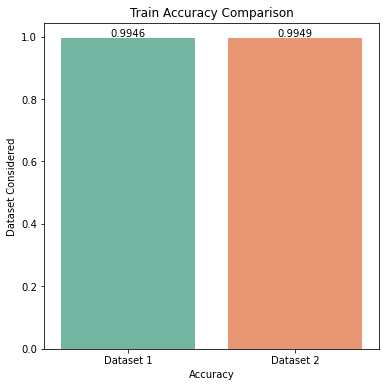

In [49]:
accuracy01=pd.DataFrame({"Dataset Considered":model_name,"Accuracy":accuracy_scores_train})
print(accuracy01)

plt.figure(figsize=(6,6))
plt.title('Train Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Dataset Considered')

ax=sns.barplot(y = accuracy_scores_train,x = model_name,palette='Set2')
for i in ax.containers:
    ax.bar_label(i,)

  Dataset Considered  Accuracy
0          Dataset 1    0.9130
1          Dataset 2    0.5092


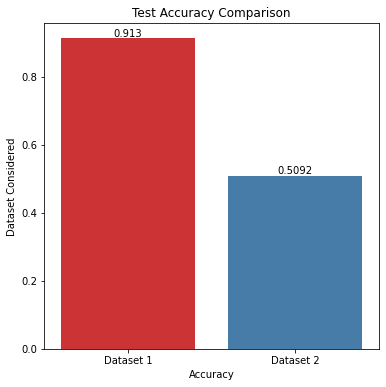

In [50]:
accuracy02=pd.DataFrame({"Dataset Considered":model_name,"Accuracy":accuracy_scores_test})
print(accuracy02)

plt.figure(figsize=(6,6))
plt.title('Test Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Dataset Considered')

ax=sns.barplot(y = accuracy_scores_test,x = model_name,palette='Set1')
for i in ax.containers:
    ax.bar_label(i,)